## 5.1 - Curve Fitting 

Linear Regression Function:
* Built in nm4p folder and can be accesed with 'from nm4p.linreg import linreg'


**lsfdemo - Program for demonstarting least squares fit routines**
* N-M appx = chi^2 means good fit

Curve fit data is created using the quadratic: 
y(x) = c(0) + c(1)*x + c(2)*x**2
Fit Parameters: 
a[0] = 4.090 +/- 0.8836
a[1] = 0.403 +/- 0.0799
a[2] = -0.019 +/- 0.0015


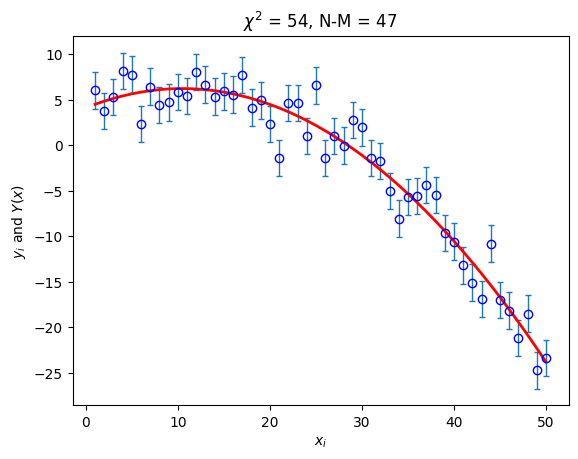

In [29]:
import numpy as np 
import matplotlib.pyplot as plt

from nm4p.linreg import linreg
from nm4p.pollsf import pollsf

print('Curve fit data is created using the quadratic: ')
print('y(x) = c(0) + c(1)*x + c(2)*x**2')

# Adjust Paramters to change data distribution. c2=0 gives straight line.
c0 = 2.0
c1 = 0.5
c2 = -0.02
c = np.array([c0, c1, c2])

N = 50                          # no. of data points
x = np.arange(1, N+1)
y = np.empty(N)
alpha = 2.0                     # est. error bar
sigma = alpha * np.ones(N)      # const. error bar

np.random.seed(0)
for i in range(N):
    r = alpha * np.random.normal()      # guassian distrubuted rand number - adds error/noise
    y[i] = c[0] + c[1]*x[i] + c[2]*x[i]**2 + r

M = 3       # number of fit parameters, 2 for straight line, more for poly
if M == 2:
    # Linear Regression (straight line) fit 
    [a_fit, sig_a, Y_x, chi_sqr] = linreg(x, y, sigma)
else: 
    # Polynomial least squares fit
    [a_fit, sig_a, Y_x, chi_sqr] = pollsf(x, y, sigma, M)


# print fit parameters and error bars
print('Fit Parameters: ')
for i in range(M):
    print(f'a[{i}] = {a_fit[i]:.3f} +/- {sig_a[i]:.4f}')

# graph the data
plt.errorbar(x,y,sigma,None,'o', elinewidth=1, capsize=2.5, markerfacecolor='none', markeredgecolor='b')     # Graph data w/ error bars
plt.plot(x, Y_x, 'r-', linewidth=2)           # Plot fit on same graph
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$ and $Y(x)$')
plt.title(r'$\chi^2$ = %d, N-M = %d' %(chi_sqr, N-M))
plt.show()

**Least squares fit on DJIA;**

Estimated value on day 6 is $2210.00 by the 2 degree polynomial
Estimated value on day 6 is $2080.00 by the 3 degree polynomial
Estimated value on day 6 is $2206.00 by the 4 degree polynomial
Estimated value on day 6 is $1720.00 by the 5 degree polynomial
The true value on day 6 was $1740.00


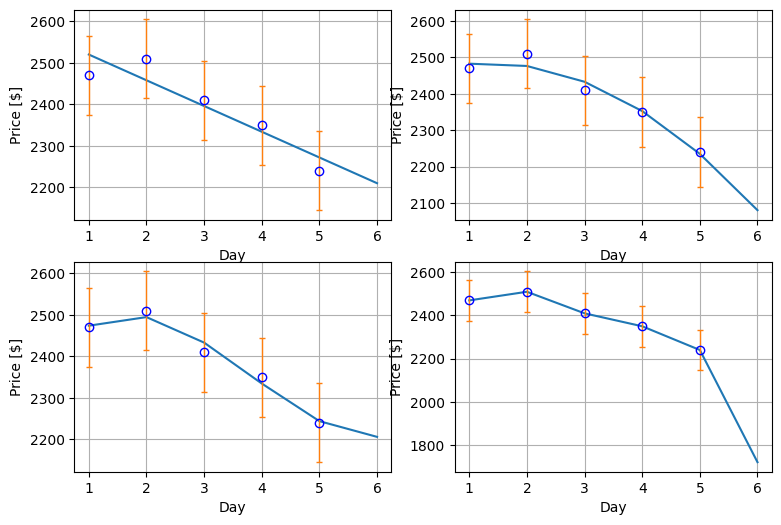

In [100]:
import numpy as np 
import matplotlib.pyplot as plt

from nm4p.pollsf import pollsf

day = np.array([1, 2, 3, 4, 5])
DJA = np.array([2470, 2510, 2410, 2350, 2240])
SD = np.ones(len(day)) * np.std(DJA)
xfull = np.arange(1, 7, 1)
plot = np.zeros((4, len(xfull)))

for i,M in enumerate(range(2,6)):
    [a_fit, sig_a, Y_x, chi_sqr] = pollsf(day, DJA, SD, M)
    y6 = np.polyval(np.flip(a_fit), 6)
    plot[i,:] = np.append(Y_x, y6)



plt.figure(None, (9,6))
for i,j in enumerate(range(1, 5)):
    plt.subplot(2, 2, j)
    plt.plot(xfull, plot[i,:])
    plt.xlabel('Day')
    plt.ylabel('Price [$]')
    plt.grid()
    plt.errorbar(day, DJA, SD, None, 'o', elinewidth=1, capsize=2.5, markerfacecolor='none', markeredgecolor='b')

for i,j in enumerate(range(2,6)):
    print(f'Estimated value on day 6 is ${plot[i,-1]:.2f} by the {j} degree polynomial')
print('The true value on day 6 was $1740.00')

## C02 Emissions

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from nm4p.linreg import linreg_no_err

df = pd.read_csv('co2_mm_mlo.csv')
df.columns

Index(['year', 'month', 'decimal date', 'average', 'deseasonalized', 'ndays',
       'sdev', 'unc'],
      dtype='object')

The most recently recorded value was 429.61 ppm
A 10% increase would put CO2 levels at 472.571 ppm


Text(0, 0.5, 'CO2 PPM')

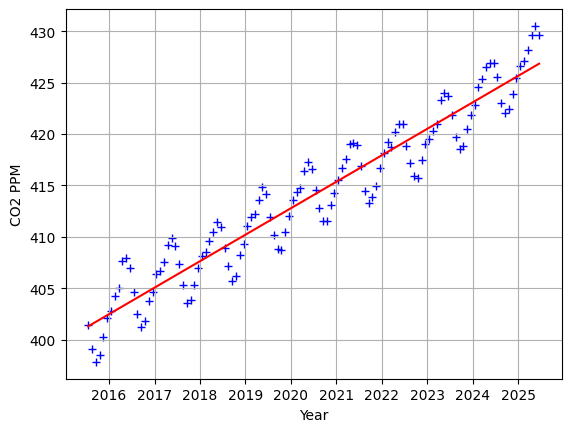

In [38]:
date_full = np.array(df['decimal date'])
co2 = np.array(df['average'])
co2_uncertainty = np.array(df['unc'])

lastDate = date_full[-1]
datePlot = []
index = []
for i, date in enumerate(date_full):
    if date > lastDate-10:
        datePlot.append(date)
        index.append(i)
datePlot = np.array(datePlot)
index = np.array(index)
co2Plot = co2[index[0]:index[-1]+1]


[a_fit, Y_x, chi_sqr] = linreg_no_err(datePlot, co2Plot)

poly_coeff = np.flip(a_fit)

print(f'The most recently recorded value was {co2Plot[-1]} ppm')
print(f'A 10% increase would put CO2 levels at {co2Plot[-1]*1.1} ppm')
plt.scatter(datePlot,co2Plot, c='b',marker='+', linewidth=1)
plt.plot(datePlot, Y_x, 'r')
plt.grid()
plt.xlabel('Year')
plt.xticks([2016,2017,2018,2019,2020,2021,2022,2023,2024,2025])
plt.ylabel('CO2 PPM')

Based on the linear regression fit, CO2 concentration will be 10% higher than present day in the year 2042.99


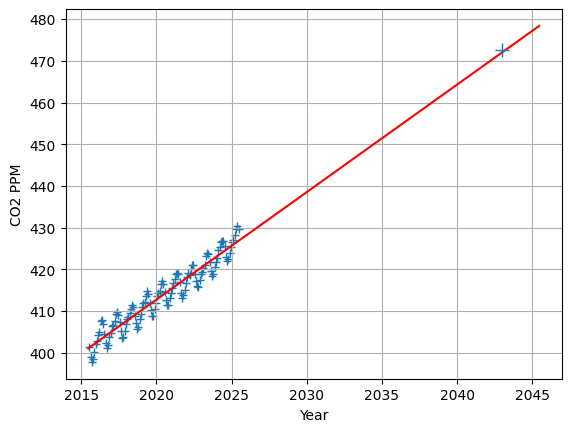

In [ ]:
x = np.linspace(lastDate-10, lastDate+20,15000)
y = np.polyval(poly_coeff, x)
for idx,val in enumerate(y):
    if val >= 472:
        break
print(f'Based on the linear regression fit, CO2 concentration will be 10% higher than present day in the year {x[idx]:.2f}')


plt.plot(x,y,'r')
plt.scatter(datePlot,co2Plot, marker='+', linewidth=1)
plt.plot(2042.99, 472.57, '+', markersize=10)
plt.xlabel('Year')
plt.ylabel('CO2 PPM')
plt.grid()
plt.show()